### Importando as bibliotecas

In [1]:
import pandas as pd
from pandas import Series 
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Estacionariedade da série temporal
from statsmodels.tsa.stattools import adfuller

In [2]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('Dados//AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [3]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Vamos usar a diferenciação usando Log e médias móveis. Vamos calcular a média e o desvio padrão.

In [4]:
rolmean = data.rolling(window=12).mean() # Calculamos a média a 12 intervalos
rolstd = data.rolling(window=12).std() # Calculamos o desvio padrão a 12 intervalos
print(rolmean)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]


In [5]:
print(rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


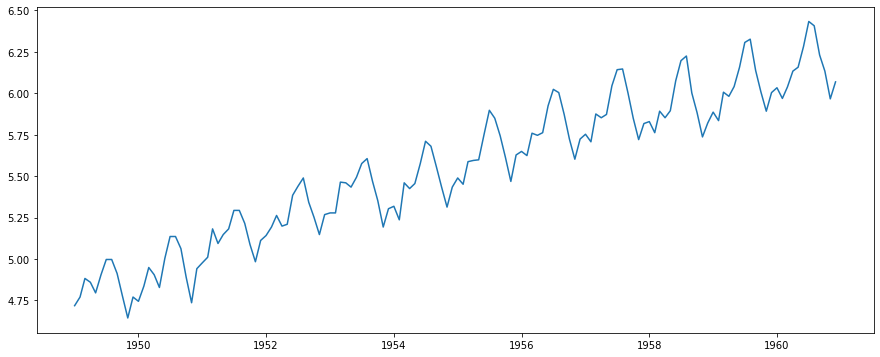

In [6]:
indexDataset_logScale = np. log(data)
plt.plot(indexDataset_logScale)

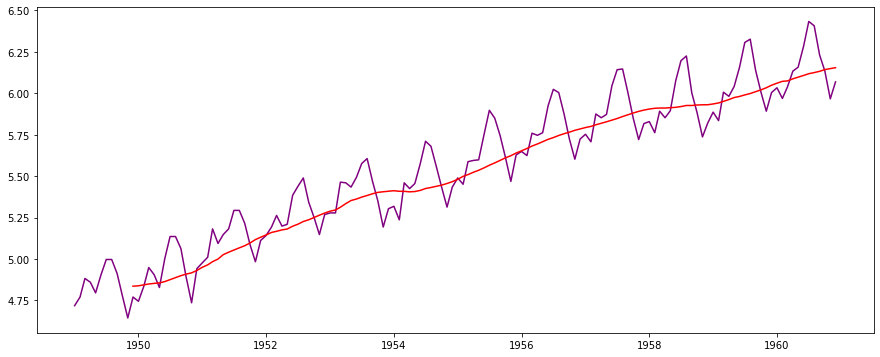

In [7]:
movingAverage = indexDataset_logScale.rolling(window=12).mean() # Cálculo da média móvel
movingSTD = indexDataset_logScale.rolling(window=12).std()
plt.plot(indexDataset_logScale, color='purple')
plt.plot(movingAverage, color='red')

Com isso fica claro que temos uma tendência, ou seja, a nossa série aplicada ao Log não tornou-se estacionária.
Vamos fazer agora uma subtração dos dados onde aplicamos os Log dos dados que aplicamos a média móvel.

In [8]:
datasetLogScaleMinusMovingAverage = indexDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


Vamos remover os dados não disponíveis(NaN)

In [9]:
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


Analisando a estacionariedade dos dados

In [10]:
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    orig = plt.plot(timeseries, color='purple', label='Série original')
    mean = plt.plot(movingAverage, color='blue', label='Média móvel')
    std = plt.plot(movingSTD, color='black', label='Desvio padrão')
    
    plt.legend(loc='best') # Coloca a legenda na melhor localização
    plt.title('Média móvel e Desvio padrão')
    
    
    print('Resultado do teste de estacionariedade de Dickey-Fuller:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Estatística do teste', 'Valor de P', 'Número de intervalos', 'Número de observações'])
    for k, v in dftest[4].items():
        dfoutput['Valor crítico: ({})'.format(k)] = v
        
    print(dfoutput)

Resultado do teste de estacionariedade de Dickey-Fuller:
Estatística do teste      -3.162908
Valor de P                 0.022235
Número de intervalos      13.000000
Número de observações    119.000000
Valor crítico: (1%)       -3.486535
Valor crítico: (5%)       -2.886151
Valor crítico: (10%)      -2.579896
dtype: float64


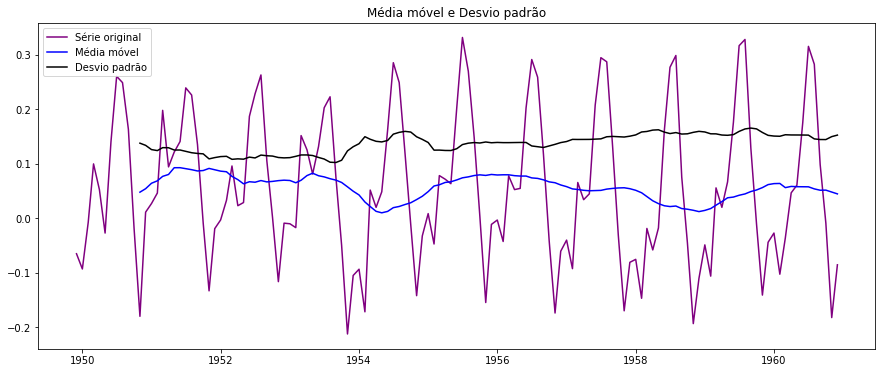

In [11]:
test_stationarity(datasetLogScaleMinusMovingAverage)

Como o valor de P está abaixo de 0.05, isso significa que os dados estão estacionário